          mu   mu_star     sigma  mu_star_conf
x1 -0.115607  2.614587  2.739827      0.053444
x2  0.079234  1.499161  1.684623      0.049889
x3 -0.009573  0.582972  0.676669      0.020012
x4 -0.016354  0.341523  0.396021      0.011874
x5  0.000030  0.035104  0.040892      0.001282
x6 -0.000464  0.033449  0.039179      0.001270
x7 -0.000152  0.034835  0.040581      0.001305
x8 -0.000124  0.034064  0.039880      0.001203


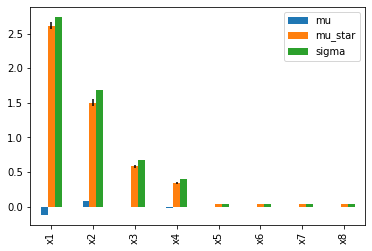

In [6]:
from SALib.test_functions import Sobol_G
from SALib.analyze import morris
from SALib.sample.morris import sample


# Specify problem context
problem = {
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 
              'x5', 'x6', 'x7', 'x8'],
    'dists': None,
    'groups': None,
    'bounds': [[0.0, 1.0],] * 8
}

# Generate samples
X = sample(problem, N=1000, num_levels=4)

# Evaluate the model
Y = Sobol_G.evaluate(X)

# Perform the sensitivity analysis using the model output
# Specify which column of the output file to analyze (zero-indexed)
Si = morris.analyze(problem, X, Y,
                    print_to_console=True,
                    num_levels=4, 
                    num_resamples=100);

# Display indicative plot
ax = Si.plot();

# Convert to DataFrame
Si_df = Si.to_df();

In [7]:
print(Si)

{'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], 'mu': array([-1.15606536e-01,  7.92339094e-02, -9.57254737e-03, -1.63537473e-02,
        2.96703604e-05, -4.64397827e-04, -1.52023042e-04, -1.23799361e-04]), 'mu_star': masked_array(data=[2.614586726191123, 1.4991608951189632,
                   0.5829717065818467, 0.34152303765324643,
                   0.03510385150971625, 0.03344865418715512,
                   0.034834912477080204, 0.034064246444585514],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=1e+20), 'sigma': array([2.73982673, 1.68462318, 0.6766691 , 0.39602136, 0.0408924 ,
       0.0391794 , 0.04058064, 0.03987996]), 'mu_star_conf': masked_array(data=[0.05344413276935058, 0.049888704899163167,
                   0.020012179731446665, 0.011874420858904635,
                   0.0012821903099906676, 0.0012695413276035726,
                   0.0013053935621442831, 0.0012034688919953117],
             mask=[False, False, 

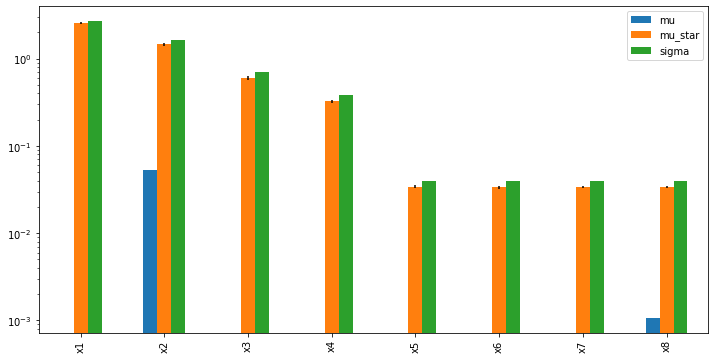

In [3]:
import matplotlib.pyplot as plt
from SALib.plotting.bar import plot as barplot


# Plot customization by manually specifying figure attributes
fig, ax1 = plt.subplots(1,1, figsize=(12,6))

ax1 = barplot(Si.to_df(), ax=ax1)

ax1.set_yscale('log')

Same as above, but without comments for publication

          mu   mu_star     sigma  mu_star_conf
x1 -0.105100  2.650752  2.777854      0.067829
x2 -0.065664  1.486701  1.676403      0.067722
x3 -0.058296  0.599013  0.690928      0.027321
x4  0.013006  0.353004  0.410667      0.019071
x5  0.000015  0.034815  0.040653      0.001873
x6  0.001894  0.033395  0.039157      0.001897
x7 -0.000216  0.036011  0.042148      0.001791
x8 -0.000791  0.034850  0.040861      0.002008


Text(0, 0.5, 'EE')

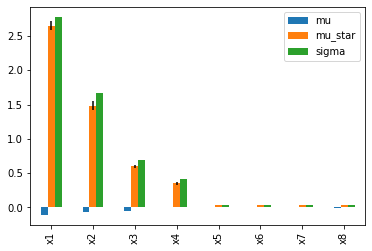

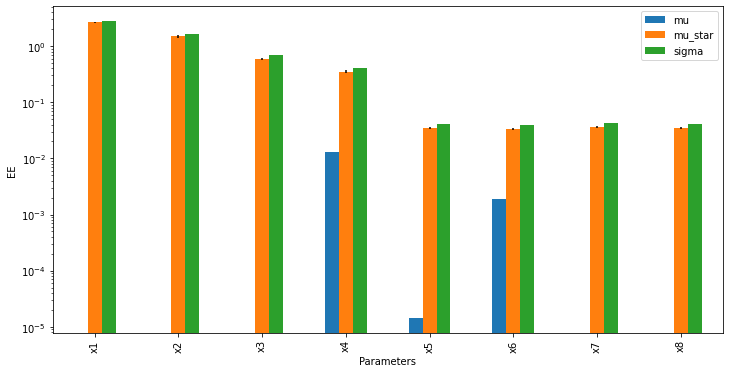

In [7]:
from SALib.test_functions import Sobol_G
from SALib.analyze import morris
from SALib.sample.morris import sample
import matplotlib.pyplot as plt
from SALib.plotting.bar import plot as barplot


problem = {
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 
              'x5', 'x6', 'x7', 'x8'],
    'groups': None,
    'bounds': [[0.0, 1.0],] * 8
}

X = sample(problem, N=512, num_levels=4)
Y = Sobol_G.evaluate(X)

Si = morris.analyze(problem, X, Y,
                    print_to_console=True,
                    num_levels=4, 
                    num_resamples=100)

Si.plot()
Si_df = Si.to_df()

fig, ax1 = plt.subplots(1,1, figsize=(12,6))
ax1 = barplot(Si.to_df(), ax=ax1)
ax1.set_yscale('log')
ax1.set_xlabel("Parameters")
ax1.set_ylabel("EE")